### **1. Carregamento das Biblioteca e dos dados**

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from skopt import gp_minimize
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.neighbors import KNeighborsClassifier
from functions import *

sns.set_palette("dark")

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

### **2. Análise dos dados**

#### 2.1 Conhecendo os dados

In [3]:
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df_informations(data)

<H3 style='text-align:left;float:lfet;'>Informações sobre o dataset

<H5> O dataset tem 10000 linhas e 14 colunas. Desses, temos:

,Not Null,Null,Perce Null,Unique,Dtype
RowNumber,10000,0,0.00%,10000,int64
CustomerId,10000,0,0.00%,10000,int64
Surname,10000,0,0.00%,2932,object
CreditScore,10000,0,0.00%,460,int64
Geography,10000,0,0.00%,3,object
Gender,10000,0,0.00%,2,object
Age,10000,0,0.00%,70,int64
Tenure,10000,0,0.00%,11,int64
Balance,10000,0,0.00%,6382,float64
NumOfProducts,10000,0,0.00%,4,int64


<H3 style='text-align:left;float:lfet;'>Tipo dos dados:

,Dtype,Perce
int64,9,64.00%
object,3,21.00%
float64,2,14.00%


Acima, podemos observar que não temos valores nulos nos nossos dados. Sendo assim, não iremos precisar fazer nenhum tratamento nessa parte. Além disso, a coluna RowNumber e CustomerID possuem somente valores únicos. Podemos, então, removê-las. A coluna Surname também não traz informações que possam ser úteis para um modelo de previsão.

Nosso próximo passo será remover as três colunas: RowNumber, CustomerID e Surname, antes de começar as análises.

In [5]:
""" Removendo as colunas que não serão utilizadas"""
data.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
""" Verificando o comportamento dos dados nas variáveis numéricas."""
data.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,432.0000,521.00,584.00,652.000,718.0000,778.000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,21.0000,27.00,32.00,37.000,44.0000,53.000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,0.0000,1.00,3.00,5.000,7.0000,9.000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.00,0.00,97198.540,127644.2400,149244.792,185967.9854,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.0000,1.00,1.00,1.000,2.0000,2.000,3.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.0000,0.00,0.00,1.000,1.0000,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.0000,0.00,0.00,1.000,1.0000,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,1842.8253,20273.58,51002.11,100193.915,149388.2475,179674.704,198069.7345,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.0000,0.00,0.00,0.000,0.0000,1.000,1.0000,1.00


Utilizando a função describe, não foi possível notar nenhuma anormalidade nos dados que sugira algum erro ou outlier. Sendo assim, não serão necessários maiores tratamentos sobre essa parte.

#### 2.2 Análise Gráfica

In [7]:
col_categ = data.select_dtypes('object').columns
col_cont = data.select_dtypes(np.number).columns

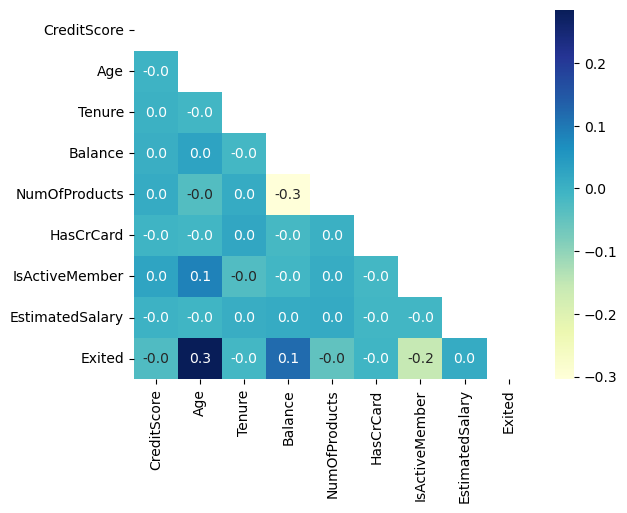

In [8]:
''' Gráfico de Correlação'''
data_cor = data[col_cont].corr().transpose()
mask = np.triu(np.ones_like(data_cor))

sns.heatmap(data_cor,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

De acordo com o gráfico, as variáveis não parecem apresentar uma correlação forte entre si. No entanto, em relação à variável target "Exited", a coluna "idade" foi a que apresentou maior correlação.

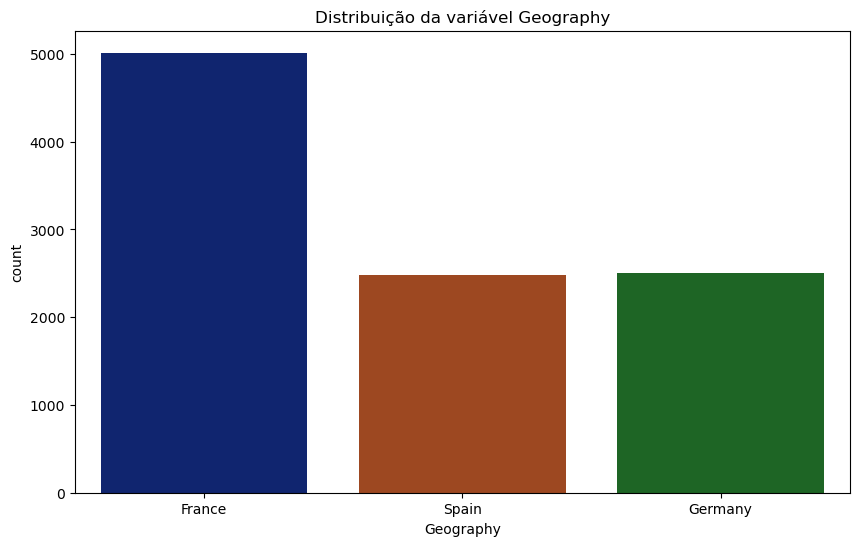

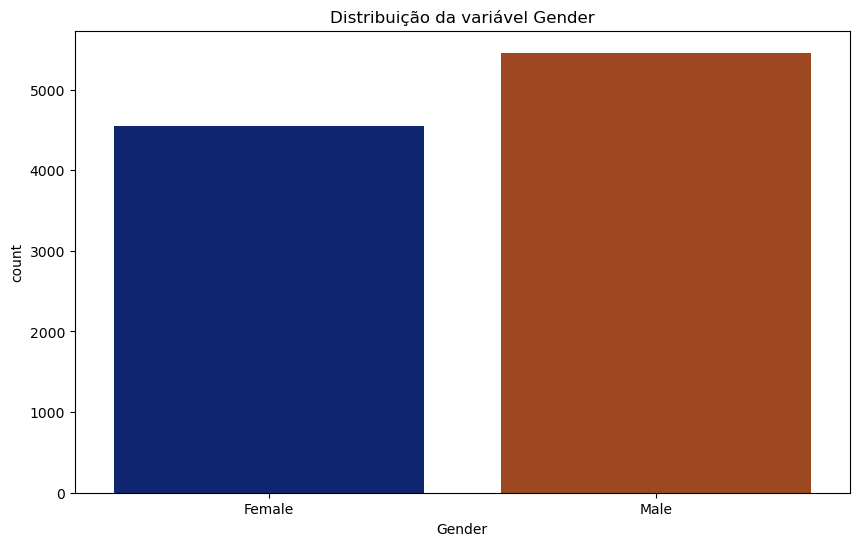

In [9]:
for var in col_categ:
    plt.figure(figsize=(10,6))
    sns.countplot(x=var, data=data)
    plt.title(f'Distribuição da variável {var}')
    plt.show()

Dentro da variável "Geography", podemos observar que cerca de 50% dos clientes estão concentrados na França, e os outros 50% são divididos quase igualmente entre Espanha e Alemanha. Já em relação à variável "Gender", apesar da maioria dos clientes serem homens, a diferença não é grande, e portanto não há nada a que se atentar.

<Figure size 1000x1000 with 0 Axes>

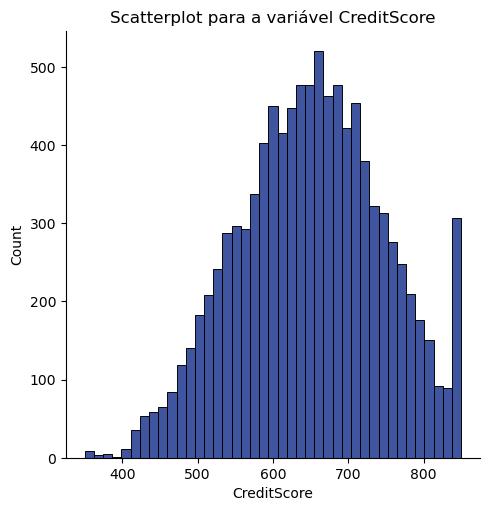

<Figure size 1000x1000 with 0 Axes>

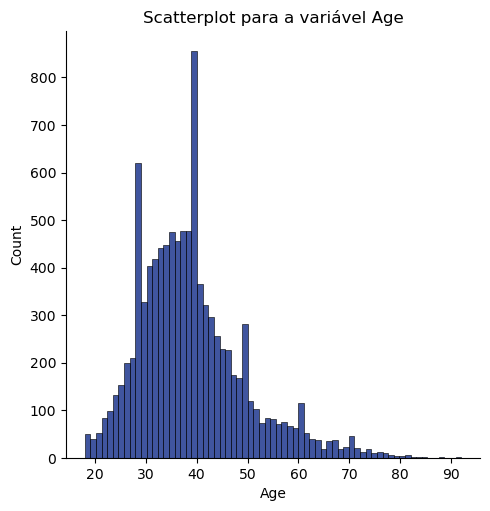

<Figure size 1000x1000 with 0 Axes>

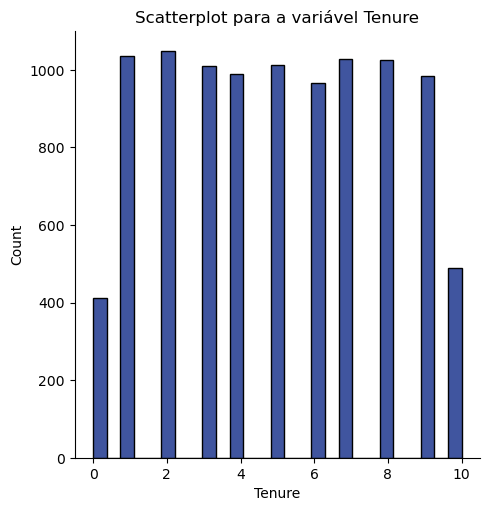

<Figure size 1000x1000 with 0 Axes>

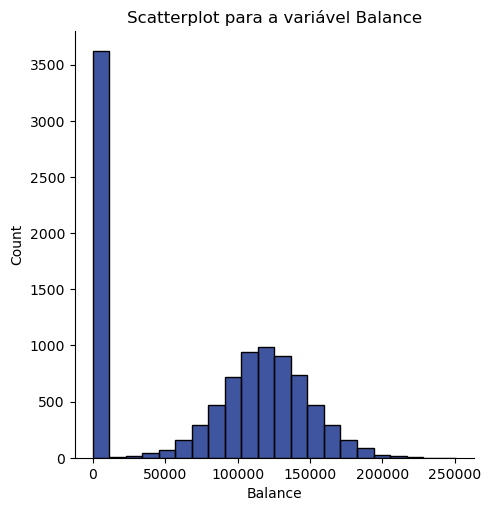

<Figure size 1000x1000 with 0 Axes>

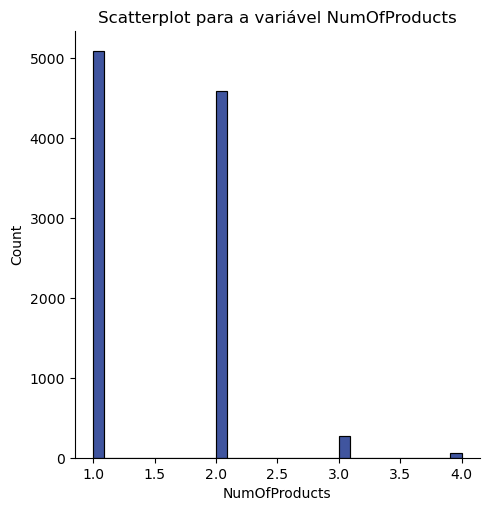

<Figure size 1000x1000 with 0 Axes>

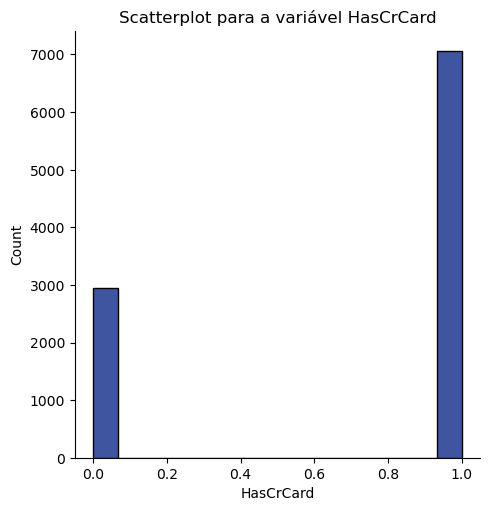

<Figure size 1000x1000 with 0 Axes>

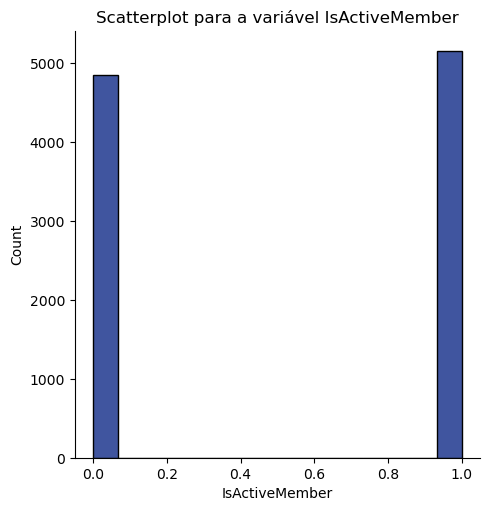

<Figure size 1000x1000 with 0 Axes>

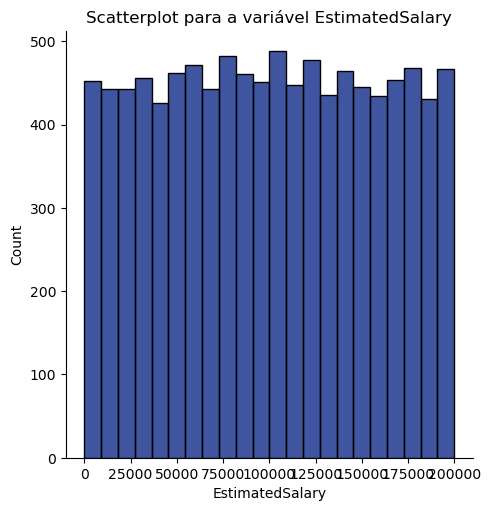

<Figure size 1000x1000 with 0 Axes>

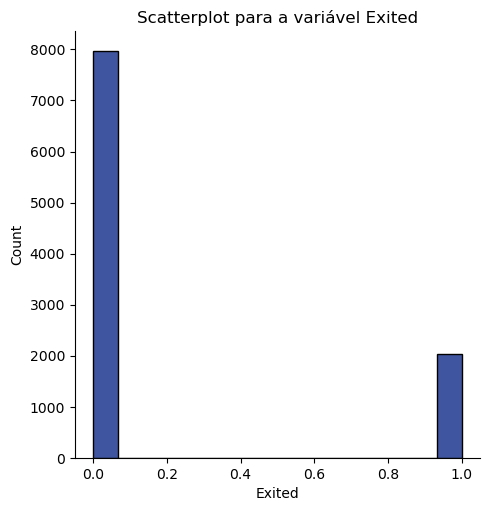

In [10]:
for var_cont in col_cont:
    plt.figure(figsize=(10,10))
    sns.displot(x=var_cont, data=data)
    plt.title(f'Scatterplot para a variável {var_cont}')
    plt.show()

Utilizamos o distplot para ver a distribuição das variáveis contínuas 
1. A coluna CreditScore apresenta uma distribuição normal com um pico por volta dos 900 pontos de score.
2. A coluna Idade que foi a que apresentou maior correlação com a target tem uma distribuição normal porém também com três picos, um por volta dos 29 outro dos 39 e o último por volta dos 49 anos. 
3. Dentro da Tenure não conseguimos notar nenhuma anormalidade.
4. A balance possui uma distribuição normal porém um pico já esperado em 0. 
4. Dentro das outras não temos muito mais o que observar no distplot, em sua maioria são variáveis binárias com distribuições normais, com excessão da variável target a Exited que possui uma quantidade significativamente maior de não cancelamento do que cancelamento.

##### Relação variável com o target.

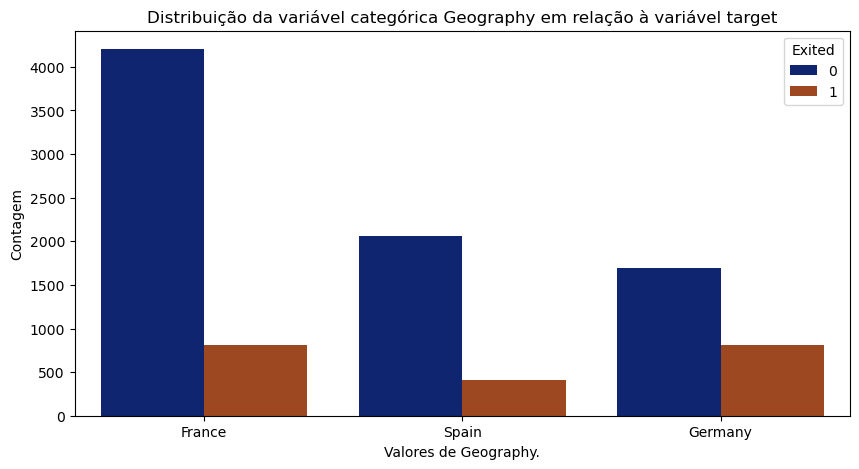

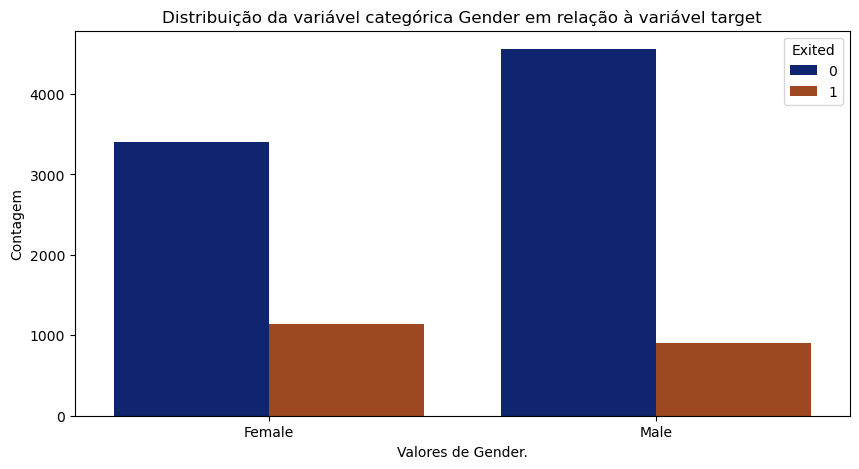

In [11]:
for col_categ1 in col_categ:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col_categ1, hue='Exited', data=data)
    plt.title(f'Distribuição da variável categórica {col_categ1} em relação à variável target')
    plt.xlabel(f'Valores de {col_categ1}.')
    plt.ylabel('Contagem')
    plt.show()

Dentro da coluna Geography conseguimos observar algo interessante, apesar de França possui o maior número de clientes, tendo cerca de o dobro dos outros clientes quando se refere de cancelamento os 3 países ficam bem próximos.
Podemos observar a mesma relação porém de forma mais discreta na coluan gender que apesar de possuir uma quantidade maior de homens a quantidade de cancelamento efetuado por homens é menor. 

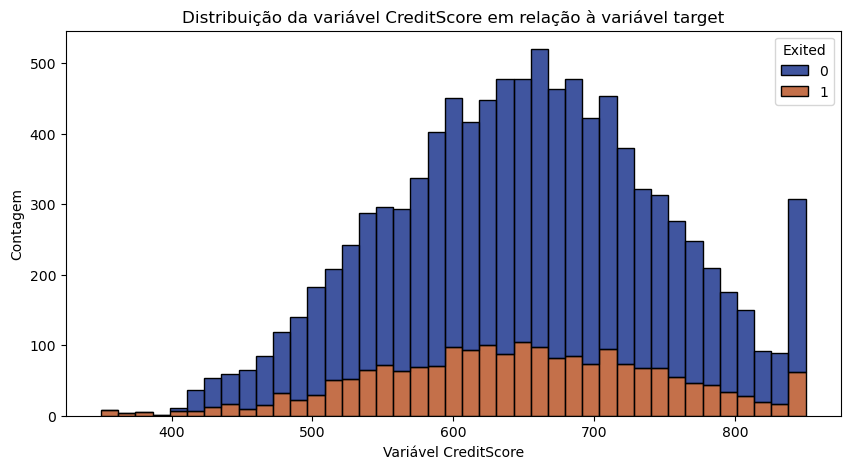

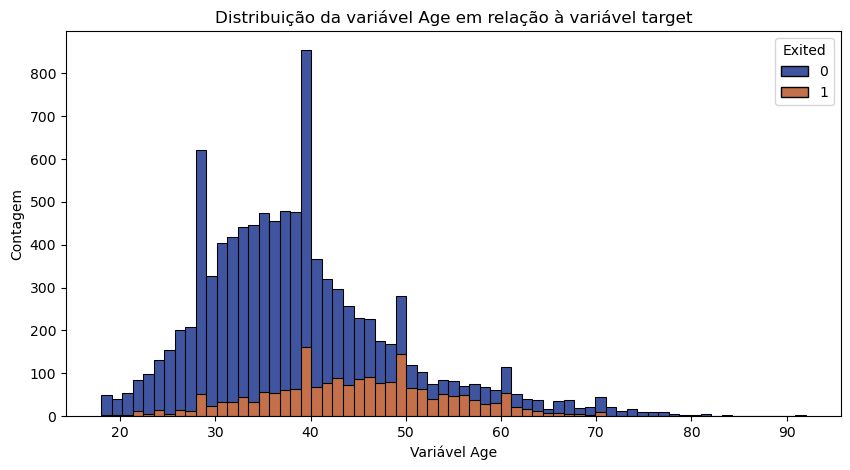

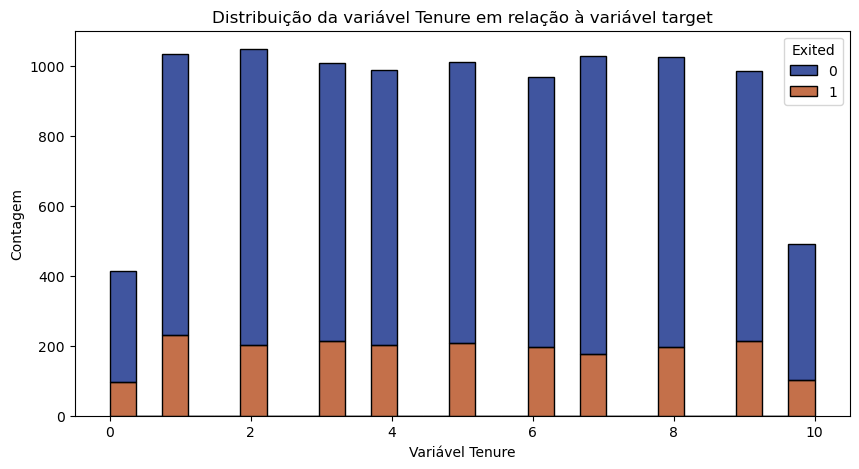

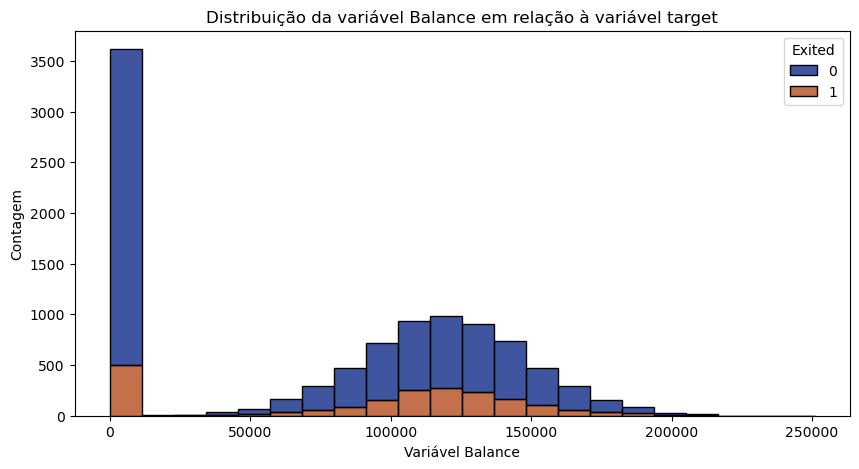

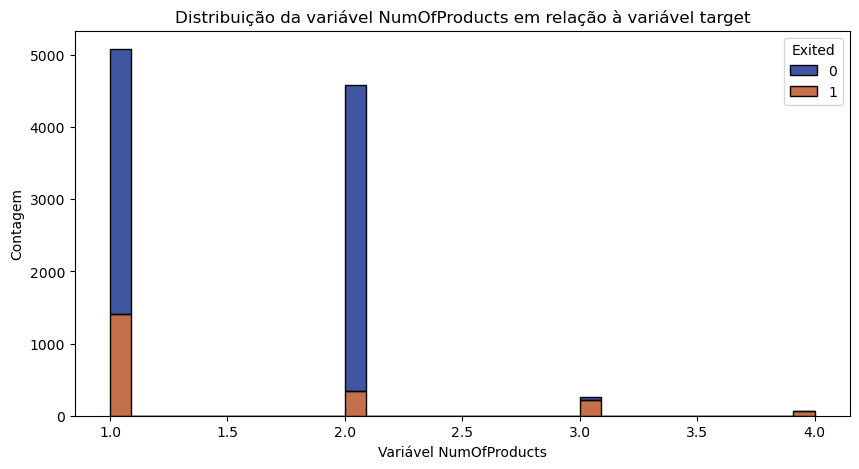

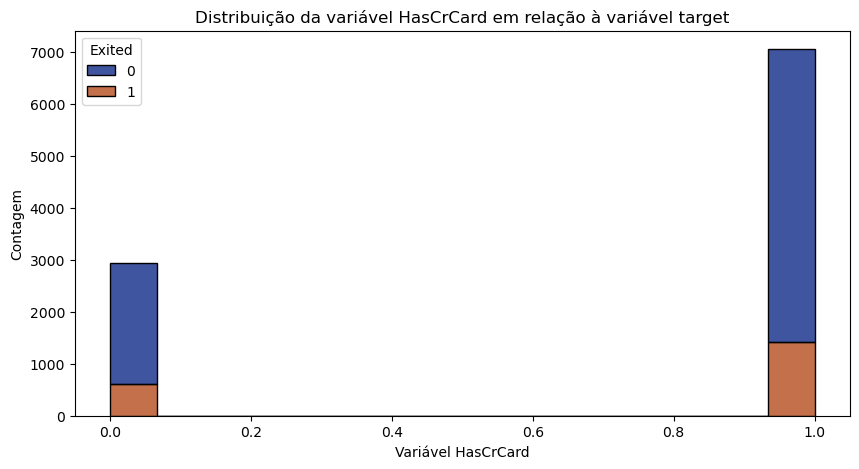

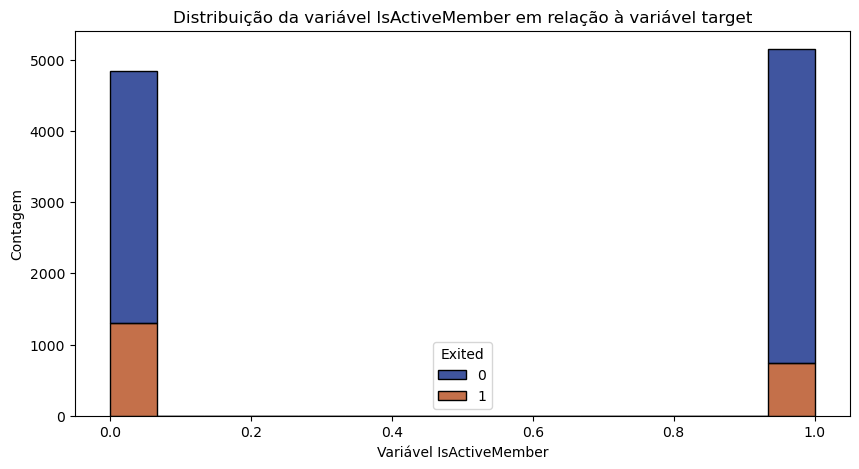

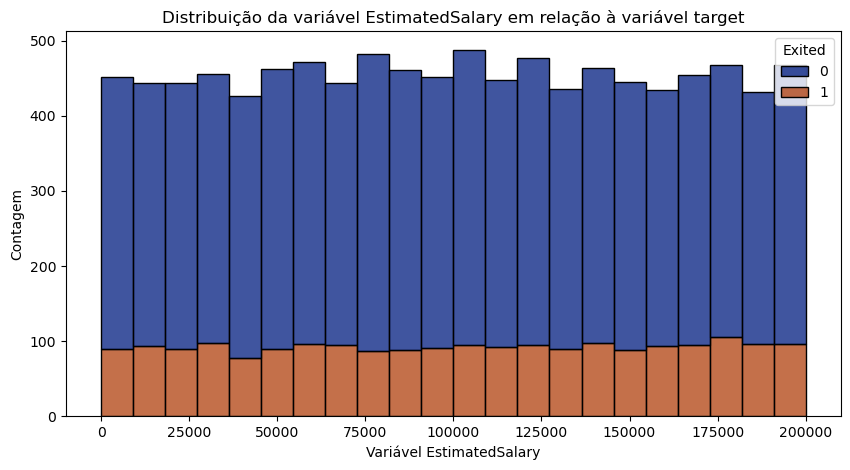

In [12]:
for col_cont1 in col_cont:
    if col_cont1 != 'Exited':
        plt.figure(figsize=(10,5))
        sns.histplot(x=col_cont1, hue='Exited', data=data, multiple='stack') 
        plt.title(f'Distribuição da variável {col_cont1} em relação à variável target') 
        plt.xlabel(f'Variável {col_cont1}')
        plt.ylabel('Contagem')
        plt.show()

Observando a relação entre cancelamento e as variáveis contínuas não conseguimos notar nenhuma linha de tendência significativa, normalmente a taxa de cancelamento acompanha a quantidade de clientes.

#### Pré Processamento

In [13]:
X = data.drop(columns='Exited')
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Como boa prática iniciamos o pré processamento realizando o split de dados em treino e teste evitando assim que ocorra data leakage no modelo, [Clique aqui para saber o que é Data Leakage](https://blog.neoway.com.br/data-leakage/)

In [14]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,619,Spain,Female,32,4,175406.13,2,1,1,172792.43
2603,643,Germany,Female,34,7,160426.07,1,0,1,188533.11
7738,561,France,Male,33,6,0.00,2,0,0,173680.39
1579,618,Germany,Male,41,8,37702.79,1,1,1,195775.48
5058,714,France,Male,37,9,148466.93,2,0,1,151280.96


Iremos agora efetuar a normalização dos dados, para isso iremos utilizar o Robust Scaler, que é uma técnica bem parecida com o Standard Scaler porém é menos sensível ao outliers.

In [15]:
Robust = RobustScaler()

cont_col_transform = X_train.select_dtypes(np.number).columns

Robust.fit(X_train[cont_col_transform])


RobustScaler()

In [16]:
X_train[cont_col_transform] = Robust.transform(X_train[cont_col_transform])

In [17]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,-0.255159,Spain,Female,-0.416667,-0.235294,0.617345,1.0,0.0,0.0,0.729331
2603,-0.075047,Germany,Female,-0.250000,0.470588,0.500169,0.0,-1.0,0.0,0.888913
7738,-0.690432,France,Male,-0.333333,0.235294,-0.754703,1.0,-1.0,-1.0,0.738334
1579,-0.262664,Germany,Male,0.333333,0.705882,-0.459787,0.0,0.0,0.0,0.962337
5058,0.457786,France,Male,0.000000,0.941176,0.406623,1.0,-1.0,0.0,0.511245
...,...,...,...,...,...,...,...,...,...,...
5734,0.863039,France,Male,1.416667,0.705882,-0.209402,0.0,0.0,0.0,-0.319068
5191,0.217636,France,Female,1.750000,-0.941176,-0.754703,0.0,0.0,0.0,-1.015300
5390,0.615385,France,Female,0.083333,-0.941176,-0.754703,2.0,-1.0,-1.0,-0.087522
860,0.105066,France,Male,0.500000,0.705882,0.733279,0.0,0.0,-1.0,-0.033913


O nosso próximo passo será realizar o encoder das variáveis categóricas, para o encoder a técnica escolhida foi o Target Encoder pois é uma técnica que apresenta bons resultados em modelos de árvores que serão a nossa prioridade visto que são modelos muito bons para dados desbalanceados como o nosso. 

In [18]:
''' Criando o encoder e fazendo fit com dados de treino.'''
encoder = ce.TargetEncoder(cols=['Geography', 'Gender'])
encoder.fit(X_train, y_train)

''' Realizando encoder nos dados de treino.'''
X_train = encoder.transform(X_train)

In [19]:
''' Aplicando as transformações na base de teste.'''

X_test[cont_col_transform] = Robust.transform(X_test[cont_col_transform])

X_test = encoder.transform(X_test)

### **3. Modelling**

**Modelos que serão avaliados.**

1. [Logistic Regression](https://www.tibco.com/pt-br/reference-center/what-is-logistic-regression/) - O modelo de regressão logística é usado para prever a probabilidade de ocorrência de um evento binário, como 'sim' ou 'não', com base em dados históricos. Ele funciona ajustando uma curva logística aos dados, para modelar a relação entre a variável dependente e as variáveis independentes. 

2. [XGBoost](https://sigmoidal.ai/xgboost-aprenda-algoritmo-de-machine-learning-em-python/) - O XGBoost tem algumas vantagens em relação a outros modelos de árvore de decisão, como a capacidade de lidar com dados desbalanceados, pois é possível ajustar os pesos das classes durante o treinamento. Além disso, ele possui regularização para evitar overfitting e pode lidar com grande número de features.

3. [Gradient Boosting](https://medium.com/equals-lab/uma-breve-introdução-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099) - O Gradient Boosting é um modelo que cria uma sequência de modelos fracos e combina-os para formar um modelo forte. É uma técnica poderosa para dados desbalanceados, pois pode lidar com a classe minoritária, criando gradualmente um modelo que se concentra nessa classe.

**Métrica de acurácia:**

A métrica de acurácia escolhida foi a Recall que é a proporção de verdadeiros positivos (TP) sobre a soma de verdadeiros positivos e falsos negativos (FN). A cobertura mede a capacidade do modelo de identificar corretamente amostras da classe positiva.

**Tuning de Hiperparâmetro.**

Como técnica para tuning de hiperparâmetro eu optei pela [Bayesian Optimization](https://towardsdatascience.com/bayesian-optimization-with-python-85c66df711ec) que é uma das minhas técnicas favoritas para realizar esse tuning, o tuning para o Bayesian Optimization é realizado em 3 etapas. 

1. É feita a construção de um modelo probabilístico, é construído um modelo que representa a função objetivo e seus hiperparâmetros. Normalmente, usa-se um modelo de regressão gaussiana para modelar a função objetivo, e uma distribuição priori para os hiperparâmetros. 

2. É realizada a seleção do próximo conjunto de hiperparâmetros, a partir do modelo probabilístico, é definida uma função de aquisição que determina qual conjunto de hiperparâmetros deve ser avaliado na próxima iteração. A função de aquisição considera tanto a incerteza sobre a função objetivo quanto a qualidade dos valores de hiperparâmetros já avaliados.

3. Terceira e última parte, o modelo faz a avaliação do conjunto de hiperparâmetros, o conjunto de hiperparâmetros selecionado pela função de aquisição é avaliado na função objetivo. O resultado da avaliação é usado para atualizar o modelo probabilístico e continuar o processo.

Resumindo, bayesian optimization é uma técnica de tunning de hiperparâmetros que utiliza modelos probabilísticos para guiar a seleção dos hiperparâmetros a serem avaliados.

##### Modelo de Logistic Regression

In [20]:
''' Bayesian Optimization'''

def treinar_modelo(params):
    C = params[0]
    max_iter = params[1]
    solver = params[2]

    print(params, '\n')
    

    mdl = LogisticRegression(class_weight='balanced',
                             C=C, 
                             max_iter=max_iter,
                             penalty='l2',
                             solver = solver,
                             random_state=42)

    mdl.fit(X_train, y_train)

    p = mdl.predict(X_test)

    return -recall_score(y_test, p)


space = [(0.001, 1.0), # C
         (100, 1000), # max_iter
         ('sag', 'lbfgs')] # solver
Bay_LR = gp_minimize(treinar_modelo, space, n_calls=30, random_state=42, verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
[0.7967464438733728, 265, 'sag'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0987
Function value obtained: -0.7192
Current minimum: -0.7192
Iteration No: 2 started. Evaluating function at random point.
[0.5972533077885406, 501, 'lbfgs'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1363
Function value obtained: -0.7192
Current minimum: -0.7192
Iteration No: 3 started. Evaluating function at random point.
[0.4597896430739014, 400, 'lbfgs'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0499
Function value obtained: -0.7106
Current minimum: -0.7192
Iteration No: 4 started. Evaluating function at random point.
[0.6512375844759042, 151, 'sag'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0781
Function value obtained: -0.7192
Current minimum: -0.7192
Iteration No: 5 started. Evaluating function at random point.
[0.93861415630

In [21]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('C =',Bay_LR.x[0])
print('max_iter =',Bay_LR.x[1])
print('solver =',Bay_LR.x[2])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

C = 0.6178640281180889
max_iter = 650
solver = lbfgs


In [22]:
Result_LR = []
Model_LR = LogisticRegression(C = Bay_LR.x[0],
                           max_iter = Bay_LR.x[1],
                           class_weight='balanced',
                           penalty = 'l2',
                           solver=Bay_LR.x[2], random_state=42)

In [23]:
cv_classi(Model_LR, X_train, y_train, Result_LR)

Repetição:  0
Treino 5250
Valid 1750
Repetição: 0
Recall: 0.6857142857142857

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.675392670157068

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.6657303370786517

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.7095890410958904

Repetição:  1
Treino 5250
Valid 1750
Repetição: 1
Recall: 0.7412790697674418

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.6610644257703081

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.7103825136612022

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.6450777202072538

Repetição:  2
Treino 5250
Valid 1750
Repetição: 2
Recall: 0.7018970189701897

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.6449864498644986

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.7340425531914894

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.6578171091445427

Repetição:  3
Treino 5250
Valid 1750
Repetição: 3
Recall: 0.7014492753623188

Treino 5250
Valid 1750
Repetição: 3
Recall: 0.6648793565683646

Treino 5250
Valid 1750
Repetição: 3
Recall: 0.691

In [24]:
print(f'O modelo de regressão logística apresentou o recall médio de {round(np.mean(Result_LR)*100,2)}% na base de treino')

O modelo de regressão logística apresentou o recall médio de 68.68% na base de treino


In [27]:
''' Fazendo o predict e calculando recall na base de teste.'''
pred_LR = Model_LR.predict(X_test)
Recall_LR = recall_score(y_test, pred_LR)

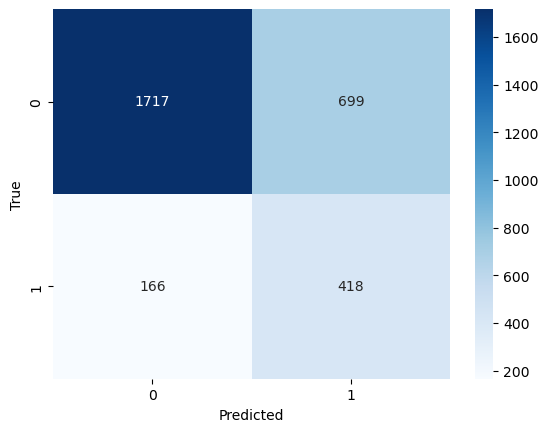

In [28]:
''' Código para verificar a matriz de confusão.'''
cm = confusion_matrix(y_true = y_test, y_pred = pred_LR)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
''' Calculando FPR (False Positive Rate)'''
FPR_LR = 699 / (1717 + 699) * 100

In [30]:
print(f'O modelo de Regressão Logística apresentou um índice de Recall de {round(Recall_LR*100,2)}% e a taxa de FPR de {round(FPR_LR,2)}%') 

O modelo de Regressão Logística apresentou um índice de Recall de 71.58% e a taxa de FPR de 28.93%


Como podemos observar o modelo de Regressão Logística apresentou uma boa pontuação de recall porém a taxa de falso positivo está relativamente alta, iremos observar os outros modelos tentando achar um melhor equilíbrio entre ambas.

#### XGBoost

In [33]:
""" Bayesian Optimization"""

def treinar_modelo_XGB(params):
    gamma = params[0]
    max_depth = params[1]
    learning_rate = params[2]
    colsample_bytree  = params[3]
    scale_pos_weight  = params[4]
    subsample  = params[5]
    print(params, '\n')
    

    mdl_XGB = XGBClassifier(gamma = gamma,
                            learning_rate=learning_rate, max_depth=max_depth, 
                            colsample_bytree =colsample_bytree , 
                            reg_lambda=0,
                            scale_pos_weight =scale_pos_weight,
                            subsample = subsample,
                            n_estimators=3000, random_state=42)

    mdl_XGB.fit(X_train, y_train)

    p = mdl_XGB.predict(X_test)

    return -recall_score(y_test, p)

space_XGB = [(0.1, 8), # gamma
             (2, 6), # max_depth
             (0.01, 0.5), # learning_rate
             (0.1, 0.7), # colsample_bytree
             (0, 2), #scale_pos_weight
             (0.1,0.8)] # subsample

Bay_XGB = gp_minimize(treinar_modelo_XGB, space_XGB, n_calls=30, random_state=42, verbose = 0)

[6.392689596195841, 3, 0.39204859013365706, 0.4581100947678922, 1, 0.16998244107260205] 

[3.728066246530352, 3, 0.08000474078175099, 0.4905330837693118, 0, 0.6053991405867775] 

[7.514566401224428, 2, 0.4961836640526967, 0.47048890577662994, 1, 0.1049464136538022] 

[0.2821931578271845, 4, 0.20593187614047526, 0.12799939792816928, 2, 0.262939938301213] 

[0.8157908328092844, 4, 0.1974063757209098, 0.689938531484073, 1, 0.7019582847154245] 

[5.474429554843461, 4, 0.0164998309683346, 0.6653210534109117, 1, 0.36979155177794143] 

[0.22613339253969217, 3, 0.12810247835274577, 0.509958111295275, 1, 0.6832364382153152] 

[1.4695807627114, 4, 0.09929568301615055, 0.5532168461905916, 1, 0.24555916400773223] 

[4.584832589777934, 2, 0.4227195395515494, 0.36985248002185944, 1, 0.7486612060556561] 

[5.845448767265726, 3, 0.2895175474586458, 0.4125005560154943, 2, 0.6911736940747062] 

[0.1, 6, 0.01, 0.7, 2, 0.8] 

[8.0, 6, 0.5, 0.1, 2, 0.8] 

[0.1, 2, 0.01, 0.7, 2, 0.8] 



c:\Users\Suporte\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[0.1, 2, 0.01, 0.7, 2, 0.8] 

[8.0, 2, 0.5, 0.7, 2, 0.1] 

[8.0, 6, 0.5, 0.1, 1, 0.1] 

[0.1, 2, 0.5, 0.1, 2, 0.8] 

[2.637839863221718, 3, 0.5, 0.7, 2, 0.8] 

[8.0, 2, 0.01, 0.7, 2, 0.8] 

[8.0, 2, 0.01, 0.10000000000000003, 2, 0.1] 

[8.0, 2, 0.5, 0.1, 2, 0.8] 

[3.9594491502982256, 2, 0.01, 0.1, 2, 0.8] 

[7.137033956011079, 2, 0.42912768166714615, 0.1036718556408218, 2, 0.14500003071336723] 

[0.17559686601365423, 3, 0.48301776411843134, 0.5381088027804186, 1, 0.1667081191213921] 

[7.095990661624669, 6, 0.01024565444304268, 0.5106041916798786, 2, 0.7809761837461427] 

[8.0, 6, 0.01, 0.7, 2, 0.1] 



c:\Users\Suporte\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[8.0, 2, 0.01, 0.7, 2, 0.8] 

[8.0, 4, 0.01, 0.7, 2, 0.8] 

[0.18287938407169918, 2, 0.12428415511818716, 0.45975775781682504, 2, 0.12378214813950343] 

[8.0, 6, 0.01, 0.7, 2, 0.8] 



In [34]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('Gamma =',Bay_XGB.x[0])
print('Max_Depht =',Bay_XGB.x[1])
print('learning_rate =',Bay_XGB.x[2])
print('colsample_bytree =',Bay_XGB.x[3])
print('scale_pos_weight =',Bay_XGB.x[4])
print('subsample =',Bay_XGB.x[5])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

Gamma = 8.0
Max_Depht = 4
learning_rate = 0.01
colsample_bytree = 0.7
scale_pos_weight = 2
subsample = 0.8


In [36]:
Result_XGB = []
XGB_Model = XGBClassifier(objective="binary:logistic",
                          gamma= Bay_XGB.x[0], max_depth=Bay_XGB.x[1],
                          learning_rate=Bay_XGB.x[2],
                          colsample_bytree =Bay_XGB.x[3] , 
                          reg_lambda=0,
                          scale_pos_weight =Bay_XGB.x[4],
                          subsample = Bay_XGB.x[5],
                          n_estimators=3000, random_state=42)

In [37]:
cv_classi(XGB_Model, X_train, y_train, Result_XGB)

Repetição:  0
Treino 5250
Valid 1750
Repetição: 0
Recall: 0.58

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.5602094240837696

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.648876404494382

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.6356164383561644

Repetição:  1
Treino 5250
Valid 1750
Repetição: 1
Recall: 0.6366279069767442

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.6358543417366946

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.6065573770491803

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.5621761658031088

Repetição:  2
Treino 5250
Valid 1750
Repetição: 2
Recall: 0.6260162601626016

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.5528455284552846

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.6622340425531915

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.6135693215339233

Repetição:  3
Treino 5250
Valid 1750
Repetição: 3
Recall: 0.6086956521739131

Treino 5250
Valid 1750
Repetição: 3
Recall: 0.6407506702412868

Treino 5250
Valid 1750
Repetição: 3
Recall: 0.5891891891891892


In [38]:
print(f'O modelo de XGBoost apresentou o recall médio de {round(np.mean(Result_XGB)*100,2)}% na base de treino')

O modelo de XGBoost apresentou o recall médio de 60.82% na base de treino


In [39]:
pred_XGB = XGB_Model.predict(X_test)
Recall_XGB = recall_score(y_test, pred_XGB)

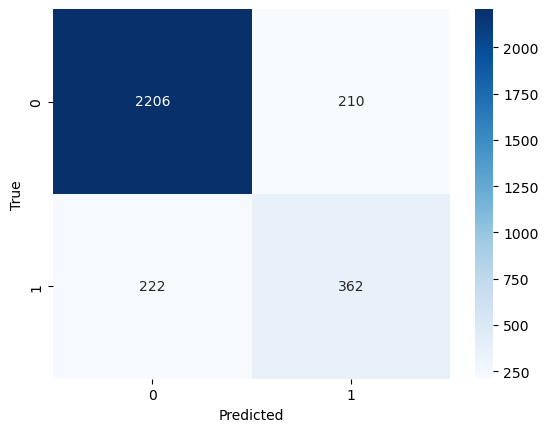

In [40]:
cm_xgb = confusion_matrix(y_test, pred_XGB)
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
''' Calculando FPR (False Positive Rate)'''
FPR_XGB = 210 / (2206 + 210) * 100

In [55]:
print(f'O modelo de Gradient Boosting apresentou um índice de Recall de {round(Recall_XGB*100,2)}% e a taxa de FPR de {round(FPR_XGB,2)}%') 

O modelo de Gradient Boosting apresentou um índice de Recall de 61.99% e a taxa de FPR de 8.69%


#### Gradient Boosting

In [43]:
def treinar_modelo_GB(params):
    learning_rate = params[0]
    max_depth = params[1]
    max_leaf = params[2]
    subsample = params[3]
    print(params, '\n')
    

    mdl = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth, 
                                     subsample=subsample, 
                                     max_leaf_nodes= max_leaf,
                                     n_estimators=1500, random_state=42)

    mdl.fit(X_train, y_train)

    p = mdl.predict(X_test)

    return -recall_score(y_test, p)


space = [(0.001, 0.20), # learning_rate
         (2, 10), # max_depth
         (2, 40), # max_leaf_nodes
         (0.1, 1)] # subsample

bay_GB = gp_minimize(treinar_modelo_GB, space, n_calls=30, random_state=42, verbose = 0)

[0.1595120543851864, 3, 32, 0.6371651421518384] 

[0.08972071781786467, 3, 19, 0.40033775002511973] 

[0.029430496766466224, 7, 4, 0.7497988950401424] 

[0.18777198909413434, 2, 40, 0.655733358664945] 

[0.12271897893716793, 2, 3, 0.5722971942325503] 

[0.08057233337133586, 2, 39, 0.3094942063872739] 

[0.019030680472031342, 7, 17, 0.9849077972261095] 

[0.09388581575634804, 9, 28, 0.5054493267725888] 

[0.00363972727081344, 10, 23, 0.4468748522859246] 

[0.004177284191822625, 4, 11, 0.7149371669429125] 

[0.1934433798974531, 3, 10, 0.87417007852038] 

[0.14099875592327543, 3, 37, 0.4508310764561394] 

[0.1682046590867862, 3, 5, 0.15330537967347807] 

[0.02294268736558377, 3, 19, 0.7087763562121471] 

[0.1315090814126283, 3, 32, 0.6501588486432143] 

[0.19763408799182483, 7, 6, 0.8849718398251296] 

[0.17986735269360227, 3, 32, 0.8964329356235998] 

[0.19728928793485878, 7, 17, 0.5523120714268879] 

[0.002410494751788986, 3, 25, 0.5544531760519464] 

[0.1669965433261947, 3, 8, 0.582119

In [44]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('learning_rate =',bay_GB.x[0])
print('max_depth =',bay_GB.x[1])
print('max_leaf_nodes =',bay_GB.x[2])
print('subsample =',bay_GB.x[3])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

learning_rate = 0.1595120543851864
max_depth = 3
max_leaf_nodes = 32
subsample = 0.6371651421518384


In [45]:
Result_GB = []
GB_Model = GradientBoostingClassifier(learning_rate=bay_GB.x[0], max_depth=bay_GB.x[1], 
                                       max_leaf_nodes=bay_GB.x[2],
                                       subsample=bay_GB.x[3],
                                       n_estimators=1500,
                                       random_state=42)

In [46]:
cv_classi(GB_Model, X_train, y_train, Result_GB)

Repetição:  0
Treino 5250
Valid 1750
Repetição: 0
Recall: 0.4942857142857143

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.4895287958115183

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.5056179775280899

Treino 5250
Valid 1750
Repetição: 0
Recall: 0.5260273972602739

Repetição:  1
Treino 5250
Valid 1750
Repetição: 1
Recall: 0.5377906976744186

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.5098039215686274

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.505464480874317

Treino 5250
Valid 1750
Repetição: 1
Recall: 0.4740932642487047

Repetição:  2
Treino 5250
Valid 1750
Repetição: 2
Recall: 0.4959349593495935

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.46070460704607047

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.5478723404255319

Treino 5250
Valid 1750
Repetição: 2
Recall: 0.5250737463126843

Repetição:  3
Treino 5250
Valid 1750
Repetição: 3
Recall: 0.5014492753623189

Treino 5250
Valid 1750
Repetição: 3
Recall: 0.5442359249329759

Treino 5250
Valid 1750
Repetição: 3
Recall: 0.48

In [47]:
print(f'O modelo de Gradient Boosting apresentou o recall médio de {round(np.mean(Result_GB)*100,2)}% na base de treino')

O modelo de Gradient Boosting apresentou o recall médio de 49.98% na base de treino


In [48]:
pred_GB_Model = GB_Model.predict(X_test)
Recall_GB_Model = recall_score(y_test, pred_GB_Model)

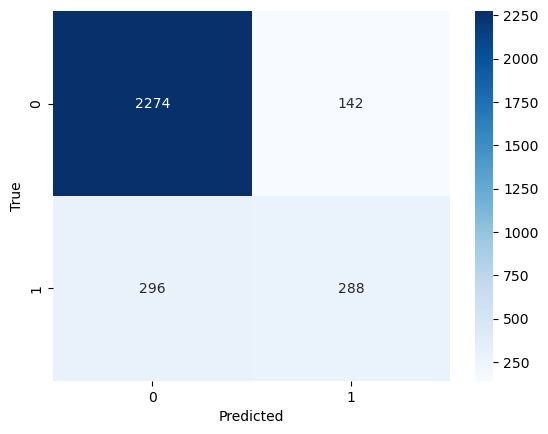

In [49]:
cm_GB = confusion_matrix(y_test, pred_GB_Model)
sns.heatmap(cm_GB, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
''' Calculando FPR (False Positive Rate)'''
FPR_GB = 142 / (2274 + 142) * 100

In [51]:
print(f'O modelo de Gradient Boosting apresentou um índice de Recall de {round(Recall_GB_Model*100,2)}% e a taxa de FPR de {round(FPR_GB,2)}%') 

O modelo de Gradient Boosting apresentou um índice de Recall de 49.32% e a taxa de FPR de 5.88%


#### Conclusão do Modelling

Após observamos a parte do modelling conseguimos ver que os modelos que se saíram melhor foram o de Logistic Regression e XGBoost, o de Logistic Regression apresentou uma maior taxa de Recall porém tem também uma taxa alta de False Positive Rate (FPR), já o XGBoost apresentou um recall um pouco abaixo mas também um valor significativamente menor de FPR, para tomar uma decisão de qual dos dois modelos prosseguir seria uma ótima opção consultar a parte de negócio e ver o quão grave é ter uma taxa de FPR mais alta, no nosso caso iremos prosseguir com o modelo de regressão logística tanto por apresentar um recall melhor quanto também pelo tempo de processamento que mostrou ser bem mais rápido que os outros dois modelos.

In [73]:
""" Nessa parte selecionaremos dos dados gerais somente os casos que ocorreram cancelamento do serviço."""
cancelamento = data[data["Exited"] == 1]

""" Aqui iremos com base no total cancelado ver a quantidade que seria prevista pelo modelo, ou seja, 71% dos casos."""
Qtd_Prev = round(len(cancelamento) * 0.71)

""" Levando em conta que o modelo foi capaz de prever 1446 casos de Churn corretamente, iremos considerar que a parte de negócio conseguiu evitar 30% desses casos."""

Qnt_Retido = round(Qtd_Prev * 0.3)

""" E por último iremos considerar a média geral do Balance para ter uma noção de qual valor o banco conseguiria reter evitando esses Churns."""

Balance_mean = round(data['Balance'].mean(),2)

Balance_retido = round(Balance_mean * Qnt_Retido,2)

print(f"Utilizando o modelo de regressão logística e considerando uma taxa de recuperação de 30% o banco iria reter o balance total de {Balance_retido}")

Utilizando o modelo de regressão logística e considerando uma taxa de recuperação de 30% o banco iria reter o balance total de 33194876.26


#### Evaluation

In [75]:
encoders = {'Robust_scaler': Robust,
            'Target_encod': encoder}

joblib.dump(Model_LR, 'Model_LR.pkl')
joblib.dump(encoders, 'Encoders.pkl')

['Encoders.pkl']